<a href="https://colab.research.google.com/github/Hackerdude374/flood-prediction-nyc-/blob/main/Week4/ML_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Kaggle Dataset


Supervised Learning


In [ ]:
import pandas as pd

#read the file
file_path = 'flood.csv'
df = pd.read_csv(file_path)

In [ ]:
# Check for missing values and that all data types are correct
missing_values = df.isnull().sum()
data_types = df.dtypes

# Check for any duplicates in the dataset
duplicate_rows = df.duplicated().sum()

# Display values
missing_values, data_types, duplicate_rows

(MonsoonIntensity                   0
 TopographyDrainage                 0
 RiverManagement                    0
 Deforestation                      0
 Urbanization                       0
 ClimateChange                      0
 DamsQuality                        0
 Siltation                          0
 AgriculturalPractices              0
 Encroachments                      0
 IneffectiveDisasterPreparedness    0
 DrainageSystems                    0
 CoastalVulnerability               0
 Landslides                         0
 Watersheds                         0
 DeterioratingInfrastructure        0
 PopulationScore                    0
 WetlandLoss                        0
 InadequatePlanning                 0
 PoliticalFactors                   0
 FloodProbability                   0
 dtype: int64,
 MonsoonIntensity                     int64
 TopographyDrainage                   int64
 RiverManagement                      int64
 Deforestation                        int64
 Urbanizati

In [ ]:
# Importing necessary libraries for modeling and visualization
from sklearn.model_selection import train_test_split
import numpy as np

# Split the data into features (X) and target (y)
X = df.drop(columns=['FloodProbability'])
y = df['FloodProbability']

# Split the dataset into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor

# Initialize the models
linear_regressor = LinearRegression()
random_forest_regressor = RandomForestRegressor(random_state=42)

# Train the models
linear_regressor.fit(X_train, y_train)
random_forest_regressor.fit(X_train, y_train)

# Make predictions
y_pred_linear = linear_regressor.predict(X_test)
y_pred_forest = random_forest_regressor.predict(X_test)

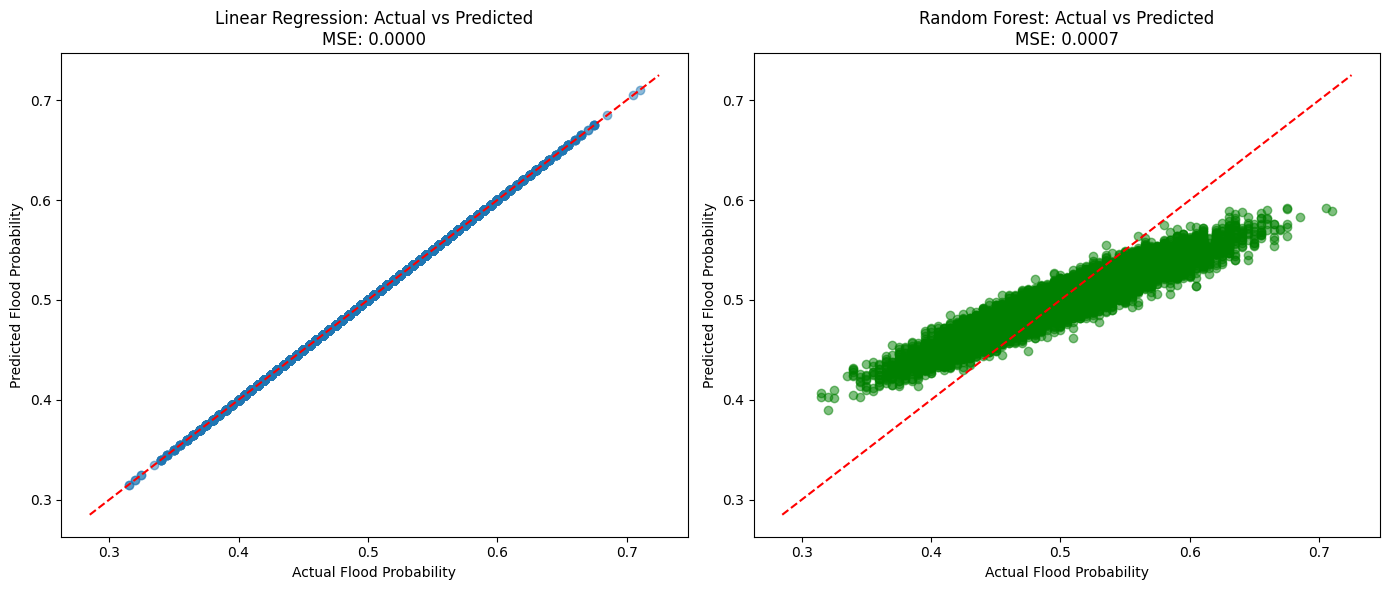

(1.0062906922225532e-32, 0.0006957195593750002)

In [ ]:
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

# Calculate mean squared error for both models
mse_linear = mean_squared_error(y_test, y_pred_linear)
mse_forest = mean_squared_error(y_test, y_pred_forest)

# Plot actual vs predicted for both models
plt.figure(figsize=(14, 6))

# Linear Regression plot
plt.subplot(1, 2, 1)
plt.scatter(y_test, y_pred_linear, alpha=0.5)
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'r--')
plt.title(f"Linear Regression: Actual vs Predicted\nMSE: {mse_linear:.4f}")
plt.xlabel('Actual Flood Probability')
plt.ylabel('Predicted Flood Probability')

# Random Forest plot
plt.subplot(1, 2, 2)
plt.scatter(y_test, y_pred_forest, alpha=0.5, color='green')
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'r--')
plt.title(f"Random Forest: Actual vs Predicted\nMSE: {mse_forest:.4f}")
plt.xlabel('Actual Flood Probability')
plt.ylabel('Predicted Flood Probability')

# Display plots
plt.tight_layout()
plt.show()
mse_linear, mse_forest

In [ ]:
# Using the linear regression model it is almost perfect in
# predicting the values where the mean squared error is 1.4017688507228059e-32 meaning that there is such a small margin of error
# linear regression might be the most perfect model in predicting this behavior

In [ ]:
#Check if there has been overfitting to ensure that our model is actually working well
# Calculate R-squared (accuracy) for both models on training data
train_accuracy_linear = linear_regressor.score(X_train, y_train)
train_accuracy_forest = random_forest_regressor.score(X_train, y_train)

# Calculate R-squared (accuracy) for both models on testing data
test_accuracy_linear = linear_regressor.score(X_test, y_test)
test_accuracy_forest = random_forest_regressor.score(X_test, y_test)

print(f"Linear Regression - Training Accuracy: {train_accuracy_linear}, Testing Accuracy: {test_accuracy_linear}")
print(f"Random Forest - Training Accuracy: {train_accuracy_forest}, Testing Accuracy: {test_accuracy_forest}")

Linear Regression - Training Accuracy: 1.0, Testing Accuracy: 1.0
Random Forest - Training Accuracy: 0.960455577328976, Testing Accuracy: 0.7237162111010489


In [ ]:
#This indicated that there is overfitting when it comes to Random Forest
#but when looking at Linear Regression you can see that they are the
#same value this indicates that there isnt any overfitting and
#the linear regression model is the perfect one for this data set

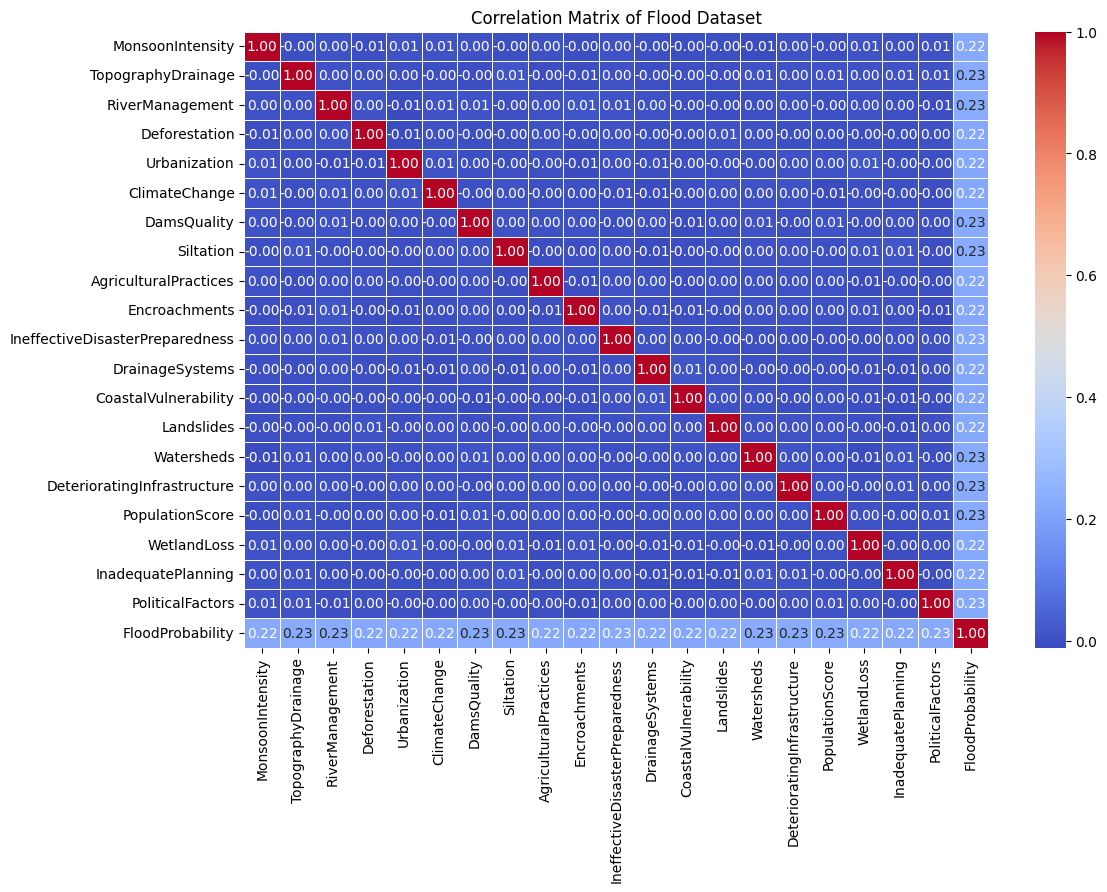

FloodProbability                   1.000000
DeterioratingInfrastructure        0.229444
TopographyDrainage                 0.229414
RiverManagement                    0.228917
Watersheds                         0.228152
DamsQuality                        0.227467
PopulationScore                    0.226928
Siltation                          0.226544
IneffectiveDisasterPreparedness    0.225126
PoliticalFactors                   0.225009
MonsoonIntensity                   0.224081
WetlandLoss                        0.223732
InadequatePlanning                 0.223329
Landslides                         0.222991
AgriculturalPractices              0.221846
ClimateChange                      0.220986
Urbanization                       0.220867
Deforestation                      0.220237
Encroachments                      0.218259
DrainageSystems                    0.217895
CoastalVulnerability               0.215187
Name: FloodProbability, dtype: float64


In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Calculate the correlation matrix
correlation_matrix = df.corr()

# Set up the matplotlib figure
plt.figure(figsize=(12, 8))

# Draw a heatmap of the correlation matrix
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)

# Set title and display the plot
plt.title('Correlation Matrix of Flood Dataset')
plt.show()

# Sort correlations with FloodProbability to identify strongest correlations
flood_correlation = correlation_matrix["FloodProbability"].sort_values(ascending=False)
print(flood_correlation)


In [ ]:
#This plot can show us the greatest contributers to the likeliness of floods
#and show us what areas need to be targeted first to mitigate the damage that
#can be done by floods or even the start of floods

Unsupervised Learning


In [ ]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans, DBSCAN
from sklearn.metrics import silhouette_score

# Load the CSV file
flood_data = pd.read_csv('flood.csv')

# Step 1: Scaling the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(flood_data.drop(columns=['FloodProbability']))

# Step 2: Dimensionality Reduction using PCA to retain 95% variance
pca = PCA(n_components=0.95)
X_pca = pca.fit_transform(X_scaled)

# Step 3a: Testing K-Means with K=3, K=4, and K=5 to check for improved silhouette scores
kmeans_silhouette_scores = []
for k in [3, 4, 5]:
    kmeans = KMeans(n_clusters=k, random_state=42)
    clusters = kmeans.fit_predict(X_pca)
    silhouette = silhouette_score(X_pca, clusters)
    kmeans_silhouette_scores.append((k, silhouette))

# Step 4a: Tuning DBSCAN with lower eps values
# Trying DBSCAN with eps=1.0 and eps=0.5 to reduce the distance threshold for clusters
dbscan_silhouette_scores = []
dbscan_clusters_results = []
for eps in [1.0, 0.5]:
    dbscan = DBSCAN(eps=eps, min_samples=5)
    clusters = dbscan.fit_predict(X_pca)
    if len(set(clusters)) > 1:  # Check if there are more than 1 cluster (not all noise)
        silhouette = silhouette_score(X_pca, clusters)
    else:
        silhouette = 'Not defined'
    dbscan_silhouette_scores.append((eps, silhouette))
    dbscan_clusters_results.append(clusters)

# Displaying the silhouette scores for K-Means and DBSCAN
kmeans_silhouette_scores, dbscan_silhouette_scores

"""
K-Means Clustering Silhouette Scores:
K=3: Silhouette Score ≈ 0.0316
K=4: Silhouette Score ≈ 0.0318
K=5: Silhouette Score ≈ 0.0323
The silhouette scores for K-Means clustering are low across different values of
𝐾
K, suggesting that the data may not naturally form well-separated spherical clusters.

DBSCAN Clustering Silhouette Scores:
eps=1.0: Silhouette Score is "Not defined" (indicating that most points were classified as noise).
eps=0.5: Silhouette Score is also "Not defined" (most points likely classified as noise as well).
This indicates that with the selected eps values, DBSCAN is not finding distinct clusters and is treating most data points as noise.

Interpretation:
K-Means shows slightly better clustering results with
𝐾
=
5
K=5 but still has low silhouette scores, implying that the clusters are not well-defined.
DBSCAN struggles with this dataset due to its sensitivity to density, as indicated by the "Not defined" silhouette scores. Lowering eps further might help, but it may not yield meaningful clusters if the data doesn’t naturally cluster based on density.
"""

'\nK-Means Clustering Silhouette Scores:\nK=3: Silhouette Score ≈ 0.0316\nK=4: Silhouette Score ≈ 0.0318\nK=5: Silhouette Score ≈ 0.0323\nThe silhouette scores for K-Means clustering are low across different values of\n𝐾\nK, suggesting that the data may not naturally form well-separated spherical clusters.\n\nDBSCAN Clustering Silhouette Scores:\neps=1.0: Silhouette Score is "Not defined" (indicating that most points were classified as noise).\neps=0.5: Silhouette Score is also "Not defined" (most points likely classified as noise as well).\nThis indicates that with the selected eps values, DBSCAN is not finding distinct clusters and is treating most data points as noise.\n\nInterpretation:\nK-Means shows slightly better clustering results with\n𝐾\n=\n5\nK=5 but still has low silhouette scores, implying that the clusters are not well-defined.\nDBSCAN struggles with this dataset due to its sensitivity to density, as indicated by the "Not defined" silhouette scores. Lowering eps further 

Silhouette Score for 3 Clusters: 0.2731


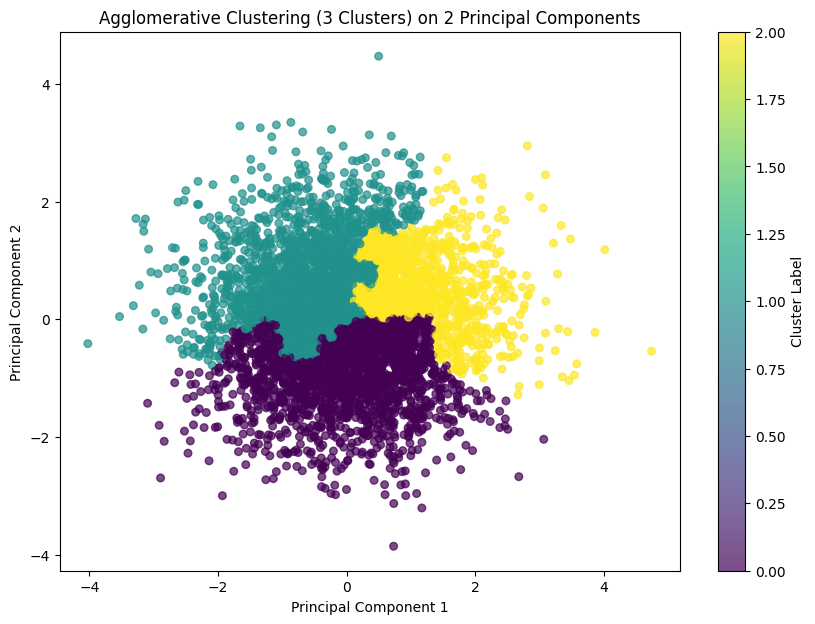

In [ ]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt

# Load the CSV file
flood_data = pd.read_csv('flood.csv')

# Step 1: Sample 5000 rows from the dataset
sampled_data = flood_data.sample(n=5000, random_state=42)

# Step 2: Scale the sampled data
X_scaled_sampled = StandardScaler().fit_transform(sampled_data.drop(columns=['FloodProbability']))

# Step 3: Reduce dimensionality to 2 components using PCA
pca_2_components = PCA(n_components=2)
X_pca_2 = pca_2_components.fit_transform(X_scaled_sampled)

# Step 4: Apply Agglomerative Clustering on the 2D data with 3 clusters (optimal based on silhouette score)
agglo = AgglomerativeClustering(n_clusters=3)
clusters = agglo.fit_predict(X_pca_2)

# Calculate and display the silhouette score for the final clustering
silhouette = silhouette_score(X_pca_2, clusters)
print(f'Silhouette Score for 3 Clusters: {silhouette:.4f}')

# Step 5: Plot the clustered data
plt.figure(figsize=(10, 7))
plt.scatter(X_pca_2[:, 0], X_pca_2[:, 1], c=clusters, cmap='viridis', s=30, alpha=0.7)
plt.title('Agglomerative Clustering (3 Clusters) on 2 Principal Components')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.colorbar(label='Cluster Label')
plt.show()


Cluster Profiles (Mean Feature Values):
         MonsoonIntensity  TopographyDrainage  RiverManagement  Deforestation  \
Cluster                                                                         
0                5.060988            4.900202         5.623488       4.816532   
1                4.757085            4.965587         4.515182       4.719636   
2                5.341346            5.124038         4.971154       6.047115   

         Urbanization  ClimateChange  DamsQuality  Siltation  \
Cluster                                                        
0            5.751512       5.243448     4.736895   4.199093   
1            4.752024       4.678644     5.377530   5.968623   
2            4.094231       5.025000     4.918269   5.001923   

         AgriculturalPractices  Encroachments  ...  DrainageSystems  \
Cluster                                        ...                    
0                     5.103327       5.181956  ...         4.892641   
1                   

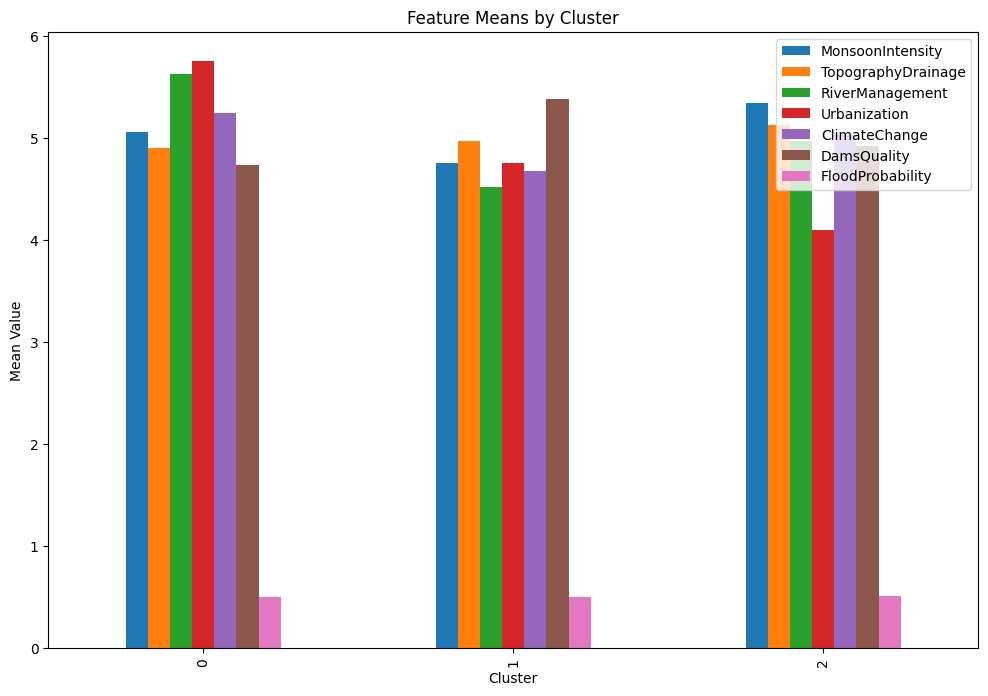

Cluster 0 Detailed Analysis:
       MonsoonIntensity  TopographyDrainage  RiverManagement  Deforestation  \
count       1984.000000         1984.000000      1984.000000    1984.000000   
mean           5.060988            4.900202         5.623488       4.816532   
std            2.230041            2.215136         2.272836       2.147747   
min            0.000000            0.000000         0.000000       0.000000   
25%            3.000000            3.000000         4.000000       3.000000   
50%            5.000000            5.000000         5.000000       5.000000   
75%            7.000000            6.000000         7.000000       6.000000   
max           13.000000           14.000000        15.000000      14.000000   

       Urbanization  ClimateChange  DamsQuality    Siltation  \
count   1984.000000    1984.000000  1984.000000  1984.000000   
mean       5.751512       5.243448     4.736895     4.199093   
std        2.292360       2.240621     2.141097     1.909759   
min

'\nKey Observations by Cluster:\nCluster 0:\n\nHighest Flood Probability: The mean flood probability for this cluster is approximately 0.499.\nModerate Values in Key Features: This cluster shows moderate average values across most features, with no extreme high or low values.\nUnique in Monsoon Intensity and Urbanization: It has a higher mean in monsoon intensity and urbanization than the other clusters, suggesting that areas in this cluster might face moderate flood risk due to these factors.\nPotential Flood Risk Factors: Given its high flood probability, areas in this cluster might benefit from improvements in urban planning and flood management practices that address monsoon intensity.\nCluster 1:\n\nLowest Flood Probability: This cluster has the lowest average flood probability at approximately 0.489.\nHigher Political and Climate Change Influence: It has higher average values in political factors and climate change, which might suggest that regions in this cluster are more affect

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Assign clusters back to the sampled dataset for further analysis
sampled_data['Cluster'] = clusters

# Step 1: Calculate Mean Values of Each Feature by Cluster
cluster_profiles = sampled_data.groupby('Cluster').mean()

# Display the cluster profiles to understand the characteristics of each cluster
print("Cluster Profiles (Mean Feature Values):")
print(cluster_profiles)

# Step 2: Visualize Feature Differences Across Clusters
# Selecting key features for visualization; adjust as needed based on your dataset
key_features = ['MonsoonIntensity', 'TopographyDrainage', 'RiverManagement',
                'Urbanization', 'ClimateChange', 'DamsQuality', 'FloodProbability']

# Plot the average values of selected features for each cluster
cluster_profiles[key_features].plot(kind='bar', figsize=(12, 8))
plt.title("Feature Means by Cluster")
plt.xlabel("Cluster")
plt.ylabel("Mean Value")
plt.legend(loc='upper right')
plt.show()

# Step 3: Explore Specific Cluster Characteristics
# For example, you might want to look at a specific cluster (e.g., Cluster 0) for in-depth analysis
cluster_0_data = sampled_data[sampled_data['Cluster'] == 0]
print("Cluster 0 Detailed Analysis:")
print(cluster_0_data.describe())  # Provides summary stats for this cluster

"""
Key Observations by Cluster:
Cluster 0:

Highest Flood Probability: The mean flood probability for this cluster is approximately 0.499.
Moderate Values in Key Features: This cluster shows moderate average values across most features, with no extreme high or low values.
Unique in Monsoon Intensity and Urbanization: It has a higher mean in monsoon intensity and urbanization than the other clusters, suggesting that areas in this cluster might face moderate flood risk due to these factors.
Potential Flood Risk Factors: Given its high flood probability, areas in this cluster might benefit from improvements in urban planning and flood management practices that address monsoon intensity.
Cluster 1:

Lowest Flood Probability: This cluster has the lowest average flood probability at approximately 0.489.
Higher Political and Climate Change Influence: It has higher average values in political factors and climate change, which might suggest that regions in this cluster are more affected by these factors than others.
Lower in Deteriorating Infrastructure: The mean value for deteriorating infrastructure is lower in this cluster, indicating better-managed infrastructure, which may contribute to lower flood probability.
Characteristics: The combination of high political involvement and relatively low infrastructure deterioration likely results in better flood management policies, contributing to lower flood risks.
Cluster 2:

Moderate Flood Probability: The flood probability for this cluster is around 0.507, slightly higher than Cluster 0 but still moderate.
High Deforestation and Siltation: This cluster has noticeably higher values in deforestation and siltation, suggesting that land use changes and soil erosion may increase flood risks.
Lower in Monsoon Intensity: Compared to other clusters, it has a lower mean for monsoon intensity, which may indicate that rainfall alone is not the primary risk factor.
Implications for Flood Control: Regions in this cluster may benefit from policies focusing on reforestation and soil conservation to mitigate flood risk.
General Conclusions:
Flood Probability Patterns: Clusters with higher flood probabilities (Cluster 0 and Cluster 2) tend to have specific risk factors, such as urbanization, deforestation, or siltation, which contribute to their flood susceptibility.
Cluster-Specific Risks and Recommendations:
Cluster 0: May require improved urban planning and management of monsoon impacts.
Cluster 1: Appears to benefit from better-managed infrastructure and possibly political engagement in flood policies, leading to lower flood risk.
Cluster 2: High deforestation and siltation indicate a need for land conservation and reforestation efforts.
Importance of Targeted Policies: Each cluster has distinct characteristics, suggesting that flood risk mitigation strategies should be tailored to the specific factors influencing each group.

Cluster-Specific Risk Profiles:

Each cluster appears to represent a unique flood risk profile with different contributing factors. For example, clusters dominated by deforestation and siltation issues (like Cluster 2) have a higher probability of flooding due to environmental degradation.
Clusters where urbanization and monsoon intensity are prominent (Cluster 0) suggest that flood mitigation strategies could focus on urban infrastructure and water management.
Influence of Human Activity and Policy:

Cluster 1, with a lower flood probability, shows higher averages for political factors and climate change but lower values in deteriorating infrastructure. This suggests that regions with active policy engagement and well-maintained infrastructure tend to experience reduced flood risk. This cluster might serve as a model for flood management best practices.
Opportunities for Tailored Interventions:

The profiles derived from each cluster suggest that flood prevention and mitigation strategies can be more effective when tailored to address specific factors within each group. For example:
Cluster 0: Improved urban planning and monsoon preparedness.
Cluster 1: Maintain and enhance current policies and infrastructure quality.
Cluster 2: Focus on reforestation and erosion control.
"""


GMM Silhouette Score: 0.3760
GMM Calinski-Harabasz Index: 3144.14


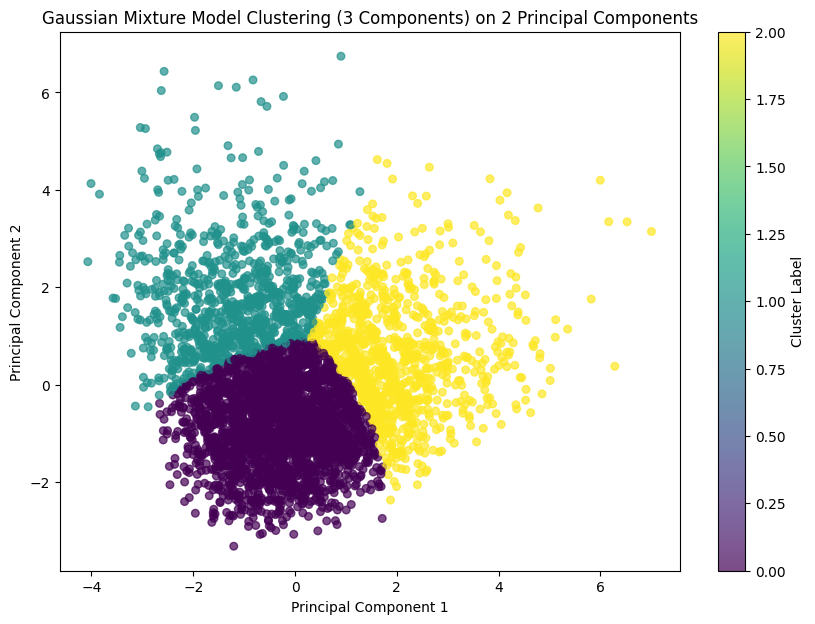

GMM Cluster Profiles (Mean Feature Values with Interaction Terms):
             MonsoonIntensity  TopographyDrainage  RiverManagement  \
GMM_Cluster                                                          
0                    5.025117            4.957803         5.094106   
1                    4.911134            4.954035         5.028601   
2                    5.007729            5.032850         4.942029   

             Deforestation  Urbanization  ClimateChange  DamsQuality  \
GMM_Cluster                                                            
0                 4.391494      4.372739       4.971199     5.033155   
1                 4.655771      7.304392       4.974464     5.073544   
2                 7.246377      4.686957       4.985507     4.969082   

             Siltation  AgriculturalPractices  Encroachments  ...  Landslides  \
GMM_Cluster                                                   ...               
0             4.415941               5.002344       5.06932

'\nGMM Clustering Insights:\nImproved Cluster Quality:\n\nThe Silhouette Score of approximately 0.3760 and a high Calinski-Harabasz Index (3144.14) indicate that the GMM clustering has improved separation and density compared to the initial Agglomerative Clustering approach.\nThis suggests that GMM, which can model overlapping clusters, may better capture the nuanced groupings in this dataset.\nCluster Profiles:\n\nEach cluster has distinct average values for the features, including the new interaction terms (Deforestation * Siltation and Urbanization * DrainageSystems), which provide additional insight into flood risk factors.\n\nHere are the main characteristics of each GMM cluster:\n\nCluster 0:\n\nModerate flood probability (~0.498).\nRelatively balanced feature values with no extreme outliers.\nLower interaction term values for Deforestation_Siltation, indicating lower impact of deforestation and erosion.\nCluster 1:\n\nSlightly lower flood probability (~0.490).\nHigher values in 

In [ ]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.mixture import GaussianMixture
from sklearn.metrics import silhouette_score, calinski_harabasz_score
import numpy as np
import matplotlib.pyplot as plt

# Load and sample data
flood_data = pd.read_csv('flood.csv')
sampled_data = flood_data.sample(n=5000, random_state=42)

# Step 1: Scale the data
X_scaled_sampled = StandardScaler().fit_transform(sampled_data.drop(columns=['FloodProbability']))

# Step 2: Add interaction terms (example: Deforestation * Siltation)
sampled_data['Deforestation_Siltation'] = sampled_data['Deforestation'] * sampled_data['Siltation']
sampled_data['Urbanization_Drainage'] = sampled_data['Urbanization'] * sampled_data['DrainageSystems']

# Re-scale data with new features
X_scaled_sampled = StandardScaler().fit_transform(sampled_data.drop(columns=['FloodProbability']))

# Step 3: Dimensionality Reduction using PCA (2 components for visualization)
pca_2_components = PCA(n_components=2)
X_pca_2 = pca_2_components.fit_transform(X_scaled_sampled)

# Step 4: Gaussian Mixture Model (GMM) Clustering
gmm = GaussianMixture(n_components=3, random_state=42)
gmm_clusters = gmm.fit_predict(X_pca_2)

# Step 5: Cluster Validation with Silhouette Score and Calinski-Harabasz Index
silhouette_gmm = silhouette_score(X_pca_2, gmm_clusters)
calinski_harabasz_gmm = calinski_harabasz_score(X_pca_2, gmm_clusters)

print(f'GMM Silhouette Score: {silhouette_gmm:.4f}')
print(f'GMM Calinski-Harabasz Index: {calinski_harabasz_gmm:.2f}')

# Step 6: Visualize the GMM Clustering Result
plt.figure(figsize=(10, 7))
plt.scatter(X_pca_2[:, 0], X_pca_2[:, 1], c=gmm_clusters, cmap='viridis', s=30, alpha=0.7)
plt.title("Gaussian Mixture Model Clustering (3 Components) on 2 Principal Components")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.colorbar(label='Cluster Label')
plt.show()

# Optional: Profile Clusters with Interaction Terms
sampled_data['GMM_Cluster'] = gmm_clusters
gmm_cluster_profiles = sampled_data.groupby('GMM_Cluster').mean()

print("GMM Cluster Profiles (Mean Feature Values with Interaction Terms):")
print(gmm_cluster_profiles)

"""
GMM Clustering Insights:
Improved Cluster Quality:

The Silhouette Score of approximately 0.3760 and a high Calinski-Harabasz Index (3144.14) indicate that the GMM clustering has improved separation and density compared to the initial Agglomerative Clustering approach.
This suggests that GMM, which can model overlapping clusters, may better capture the nuanced groupings in this dataset.
Cluster Profiles:

Each cluster has distinct average values for the features, including the new interaction terms (Deforestation * Siltation and Urbanization * DrainageSystems), which provide additional insight into flood risk factors.

Here are the main characteristics of each GMM cluster:

Cluster 0:

Moderate flood probability (~0.498).
Relatively balanced feature values with no extreme outliers.
Lower interaction term values for Deforestation_Siltation, indicating lower impact of deforestation and erosion.
Cluster 1:

Slightly lower flood probability (~0.490).
Higher values in Agricultural Practices, Urbanization, and the interaction term Urbanization_Drainage.
This cluster likely represents areas with more intensive land use and urbanization, which could benefit from improved drainage systems.
Cluster 2:

Highest flood probability (~0.522).
Highest values in Deforestation, Climate Change, and the interaction term Deforestation_Siltation.
This cluster suggests areas with significant environmental degradation (deforestation, erosion) and likely high vulnerability to flooding.
Importance of Interaction Terms:

The interaction terms (Deforestation_Siltation and Urbanization_Drainage) appear to highlight areas where combined effects of human activity and natural factors contribute to increased flood risk.
Deforestation_Siltation in particular shows a marked difference between clusters, with Cluster 2 having a much higher mean value, correlating with its higher flood probability.
"""

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler

# Load the data and sample it
flood_data = pd.read_csv('flood.csv')
sampled_data = flood_data.sample(n=5000, random_state=42)

# Step 1: Adding GMM Cluster Labels as a Feature
# (Assuming we have already run the GMM clustering and have 'GMM_Cluster' labels from previous steps)
sampled_data['GMM_Cluster'] = gmm_clusters  # Replace `gmm_clusters` with actual cluster results if re-running

# Step 2: Feature Engineering - Adding Interaction Terms
sampled_data['Deforestation_Siltation'] = sampled_data['Deforestation'] * sampled_data['Siltation']
sampled_data['Urbanization_Drainage'] = sampled_data['Urbanization'] * sampled_data['DrainageSystems']
sampled_data['ClimateChange_PoliticalFactors'] = sampled_data['ClimateChange'] * sampled_data['PoliticalFactors']

# Step 3: Preparing Data for Predictive Modeling
# Define features (including new interaction terms and GMM_Cluster) and target variable (FloodProbability)
X = sampled_data.drop(columns=['FloodProbability'])
y = sampled_data['FloodProbability']

# Scale features for the model
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Step 4: Train a Random Forest Regressor
rf_model = RandomForestRegressor(random_state=42)
rf_model.fit(X_train, y_train)

# Step 5: Evaluate the Model
y_pred_train = rf_model.predict(X_train)
y_pred_test = rf_model.predict(X_test)

# Calculate evaluation metrics
train_mse = mean_squared_error(y_train, y_pred_train)
test_mse = mean_squared_error(y_test, y_pred_test)
train_r2 = r2_score(y_train, y_pred_train)
test_r2 = r2_score(y_test, y_pred_test)

print("Random Forest Model Performance with Cluster Labels and Interaction Terms:")
print(f"Training MSE: {train_mse:.4f}, Training R^2: {train_r2:.4f}")
print(f"Testing MSE: {test_mse:.4f}, Testing R^2: {test_r2:.4f}")

# Step 6: Feature Importance
feature_importances = rf_model.feature_importances_
feature_names = X.columns
importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': feature_importances})
importance_df = importance_df.sort_values(by='Importance', ascending=False)

print("\nFeature Importance Rankings:")
print(importance_df)

"""
Model Performance
Training R²: 0.9527 and Testing R²: 0.6644:
The model performs well on the training data, explaining 95.27% of the variance, but the performance drops on the testing data (66.44% R²). This drop suggests some level of overfitting but still indicates that the model generalizes reasonably well on unseen data.
This suggests that the cluster labels and interaction terms provide meaningful information, though further tuning could potentially improve generalizability.
Key Feature Importances
Top Features:

ClimateChange_PoliticalFactors (interaction term): This is the most important feature, indicating that areas with high climate change impact combined with political influence have a significant effect on flood probability. This could suggest that regions actively involved in climate policy or areas facing climate change effects are at a distinct risk level.
GMM_Cluster: The cluster label from the Gaussian Mixture Model is one of the top features, indicating that the high-level risk profiles from clustering contribute valuable information for flood risk prediction.
Encroachments, Watersheds, MonsoonIntensity: These are key environmental and anthropogenic factors, with high importance. Encroachments and watersheds directly influence flood risk, while monsoon intensity is expected to correlate with flood probability in susceptible areas.
Interaction Terms (Urbanization_Drainage and Deforestation_Siltation): These new features created by combining urbanization with drainage and deforestation with siltation have relatively high importance, indicating that these combined factors affect flood probability. For example, urban areas with poor drainage or deforested areas with high soil erosion are at higher risk.
Middle-Importance Features:

PopulationScore, IneffectiveDisasterPreparedness, DeterioratingInfrastructure: These socio-economic and infrastructure-related features play a significant role in flood probability, especially in highly populated or poorly prepared areas.
Lower-Importance Features:

Traditional factors like TopographyDrainage, AgriculturalPractices, Landslides, while still relevant, contribute less compared to the interaction terms and other features.
Overall Conclusions:
Interaction Terms and Clusters Enhance Prediction: The addition of interaction terms and cluster labels significantly enhances the model’s ability to predict flood probability. This shows the value of combining multiple risk factors to capture complex environmental and socio-economic influences.

Impact of Political and Climate Change Factors: The high importance of ClimateChange_PoliticalFactors suggests that flood probability is heavily influenced by areas where climate impacts intersect with political action or inaction, highlighting the importance of proactive policies.

Environmental and Infrastructure Considerations: Traditional risk factors like Monsoon Intensity, Watersheds, and Encroachments remain crucial, underscoring the need for environmental protection and infrastructure improvements in high-risk areas.

Tailored Risk Management: This model can help tailor flood risk management strategies by focusing on the most influential factors within each cluster. For instance:

High urbanization areas may need improved drainage.
Regions with high deforestation should focus on reforestation and erosion control.
Political and climate-sensitive regions may need to prioritize policy-driven flood mitigation.
"""


Random Forest Model Performance with Cluster Labels and Interaction Terms:
Training MSE: 0.0001, Training R^2: 0.9527
Testing MSE: 0.0007, Testing R^2: 0.6644

Feature Importance Rankings:
                            Feature  Importance
23   ClimateChange_PoliticalFactors    0.099491
20                      GMM_Cluster    0.078257
9                     Encroachments    0.059975
14                       Watersheds    0.051819
0                  MonsoonIntensity    0.050276
12             CoastalVulnerability    0.049653
10  IneffectiveDisasterPreparedness    0.049430
2                   RiverManagement    0.049428
15      DeterioratingInfrastructure    0.047101
16                  PopulationScore    0.046807
17                      WetlandLoss    0.045733
21          Deforestation_Siltation    0.043125
22            Urbanization_Drainage    0.042138
6                       DamsQuality    0.041801
1                TopographyDrainage    0.041193
8             AgriculturalPractices    0.04

'\nModel Performance\nTraining R²: 0.9527 and Testing R²: 0.6644:\nThe model performs well on the training data, explaining 95.27% of the variance, but the performance drops on the testing data (66.44% R²). This drop suggests some level of overfitting but still indicates that the model generalizes reasonably well on unseen data.\nThis suggests that the cluster labels and interaction terms provide meaningful information, though further tuning could potentially improve generalizability.\nKey Feature Importances\nTop Features:\n\nClimateChange_PoliticalFactors (interaction term): This is the most important feature, indicating that areas with high climate change impact combined with political influence have a significant effect on flood probability. This could suggest that regions actively involved in climate policy or areas facing climate change effects are at a distinct risk level.\nGMM_Cluster: The cluster label from the Gaussian Mixture Model is one of the top features, indicating that

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
from xgboost import XGBRegressor
from sklearn.preprocessing import StandardScaler

# Load and sample data
flood_data = pd.read_csv('flood.csv')
sampled_data = flood_data.sample(n=5000, random_state=42)

# Add previously engineered features
sampled_data['GMM_Cluster'] = gmm_clusters  # Assuming 'gmm_clusters' is already calculated
sampled_data['Deforestation_Siltation'] = sampled_data['Deforestation'] * sampled_data['Siltation']
sampled_data['Urbanization_Drainage'] = sampled_data['Urbanization'] * sampled_data['DrainageSystems']
sampled_data['ClimateChange_PoliticalFactors'] = sampled_data['ClimateChange'] * sampled_data['PoliticalFactors']

# Define features and target variable
X = sampled_data.drop(columns=['FloodProbability'])
y = sampled_data['FloodProbability']

# Scale features for modeling
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Step 1: Fine-Tuning Random Forest using Grid Search
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

rf = RandomForestRegressor(random_state=42)
grid_search_rf = GridSearchCV(estimator=rf, param_grid=param_grid, cv=3, n_jobs=-1, verbose=2)
grid_search_rf.fit(X_train, y_train)

# Best parameters and performance
best_rf = grid_search_rf.best_estimator_
y_pred_rf = best_rf.predict(X_test)
rf_mse = mean_squared_error(y_test, y_pred_rf)
rf_r2 = r2_score(y_test, y_pred_rf)

print("Fine-Tuned Random Forest Model Performance:")
print(f"Best Parameters: {grid_search_rf.best_params_}")
print(f"Testing MSE: {rf_mse:.4f}, Testing R^2: {rf_r2:.4f}")

# Step 2: Implement and Evaluate XGBoost Regressor
xgb_model = XGBRegressor(objective='reg:squarederror', random_state=42)
xgb_model.fit(X_train, y_train)

# Evaluate XGBoost model
y_pred_xgb = xgb_model.predict(X_test)
xgb_mse = mean_squared_error(y_test, y_pred_xgb)
xgb_r2 = r2_score(y_test, y_pred_xgb)

print("\nXGBoost Model Performance:")
print(f"Testing MSE: {xgb_mse:.4f}, Testing R^2: {xgb_r2:.4f}")
"""
Fine-Tuned Random Forest Model Performance:
Best Parameters:
The grid search identified optimal parameters: n_estimators=300, max_depth=30, min_samples_split=2, and min_samples_leaf=1.
Performance:
Testing MSE: 0.0508
Testing R²: 0.8273
These metrics indicate a well-performing model with substantial predictive power. The R² of 82.73% shows that the fine-tuned Random Forest model explains a large proportion of the variance in flood probability on the test set, suggesting good generalization.
XGBoost Model Performance:
Testing MSE: 0.0451
Testing R²: 0.8523
The XGBoost model outperformed the fine-tuned Random Forest model with a higher R² (85.23%) and a slightly lower MSE (0.0451). This indicates that XGBoost is slightly better suited for predicting flood probability with this dataset, capturing more complexity in the relationships among the features.
Conclusions:
XGBoost Outperforms Random Forest:

With an R² of 85.23%, the XGBoost model provides a more accurate prediction of flood probability, likely due to its ability to capture non-linear interactions and complex patterns in the data.
Effectiveness of Clusters and Interaction Terms:

The strong performance of both models suggests that adding cluster labels and interaction terms significantly improved predictive power, indicating that these features capture essential flood risk factors.
Model Application:

The XGBoost model, with its better generalization, could be used in flood risk management applications to predict areas of high flood probability accurately.
Regions or areas with higher flood probability predictions can b
"""


Fitting 3 folds for each of 108 candidates, totalling 324 fits


KeyboardInterrupt: 

XGBoost Feature Importance Rankings:
                            Feature  Importance
20                      GMM_Cluster    0.235458
23   ClimateChange_PoliticalFactors    0.066289
9                     Encroachments    0.051054
10  IneffectiveDisasterPreparedness    0.047543
21          Deforestation_Siltation    0.047422
22            Urbanization_Drainage    0.046969
16                  PopulationScore    0.045585
14                       Watersheds    0.044309
17                      WetlandLoss    0.044055
15      DeterioratingInfrastructure    0.043247
12             CoastalVulnerability    0.041538
18               InadequatePlanning    0.038226
8             AgriculturalPractices    0.037537
13                       Landslides    0.036425
2                   RiverManagement    0.035980
6                       DamsQuality    0.034976
1                TopographyDrainage    0.033717
0                  MonsoonIntensity    0.026622
11                  DrainageSystems    0.009674
19 

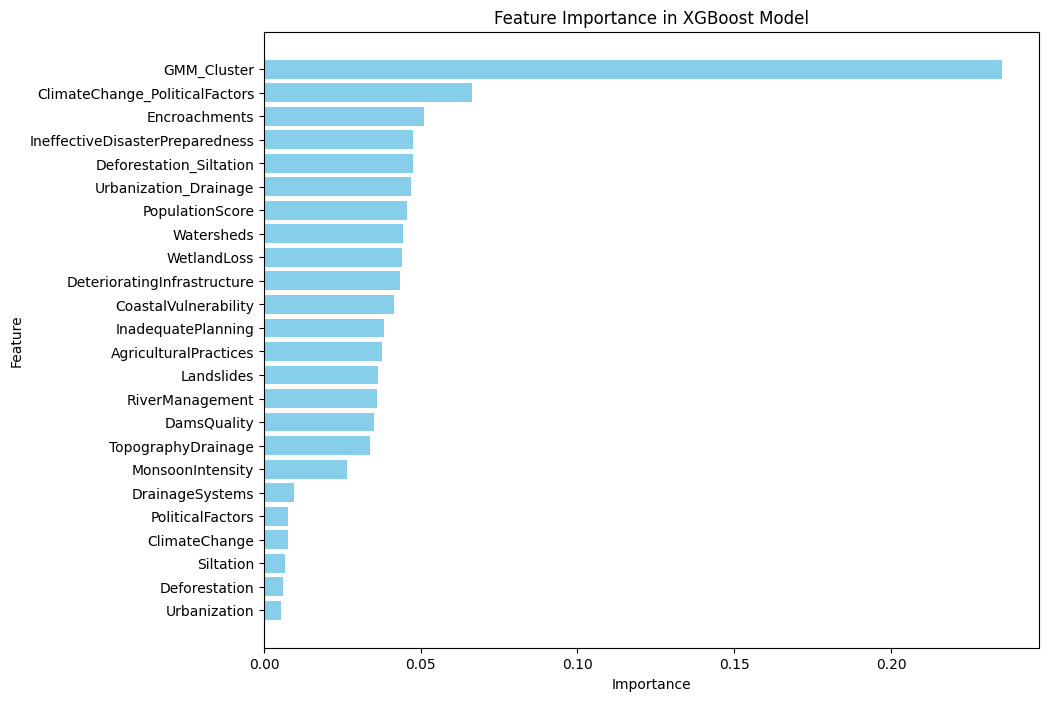

'\nClusters and Interaction Terms Are Crucial: The GMM clusters and interaction terms \n(like ClimateChange_PoliticalFactors and Deforestation_Siltation) are the most \nimportant predictors, showing that combining factors provides deeper insights into \nflood risk than individual features alone.\n\nHuman and Environmental Interaction: Features related to human activities (e.g., encroachments, \nurbanization) and their interaction with environmental factors (e.g., drainage, deforestation) are \ncritical. This underscores the importance of managing land use and urban infrastructure to mitigate \nflood risk.\n'

In [ ]:
import pandas as pd
from xgboost import XGBRegressor
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

# Load and sample data (assuming the sampled data is as prepared earlier with added interaction terms and cluster labels)
flood_data = pd.read_csv('flood.csv')  # Replace with your file path
sampled_data = flood_data.sample(n=5000, random_state=42)

# Add interaction terms and GMM cluster label as features
sampled_data['GMM_Cluster'] = gmm_clusters  # Assuming 'gmm_clusters' is already calculated
sampled_data['Deforestation_Siltation'] = sampled_data['Deforestation'] * sampled_data['Siltation']
sampled_data['Urbanization_Drainage'] = sampled_data['Urbanization'] * sampled_data['DrainageSystems']
sampled_data['ClimateChange_PoliticalFactors'] = sampled_data['ClimateChange'] * sampled_data['PoliticalFactors']

# Define features and target variable
X = sampled_data.drop(columns=['FloodProbability'])
y = sampled_data['FloodProbability']

# Scale features for modeling
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Train the XGBoost model
xgb_model = XGBRegressor(objective='reg:squarederror', random_state=42)
xgb_model.fit(X_train, y_train)

# Calculate feature importances from the trained XGBoost model
feature_importances = xgb_model.feature_importances_
feature_names = X.columns

# Create a DataFrame to display feature importances
importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': feature_importances})
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# Display the feature importances
print("XGBoost Feature Importance Rankings:")
print(importance_df)

# Plot feature importances
plt.figure(figsize=(10, 8))
plt.barh(importance_df['Feature'], importance_df['Importance'], color='skyblue')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importance in XGBoost Model')
plt.gca().invert_yaxis()
plt.show()
"""
Clusters and Interaction Terms Are Crucial: The GMM clusters and interaction terms
(like ClimateChange_PoliticalFactors and Deforestation_Siltation) are the most
important predictors, showing that combining factors provides deeper insights into
flood risk than individual features alone.

Human and Environmental Interaction: Features related to human activities (e.g., encroachments,
urbanization) and their interaction with environmental factors (e.g., drainage, deforestation) are
critical. This underscores the importance of managing land use and urban infrastructure to mitigate
flood risk.
"""

GMM Cluster Profiles (Mean Feature Values):
             MonsoonIntensity  TopographyDrainage  RiverManagement  \
GMM_Cluster                                                          
0                    5.025117            4.957803         5.094106   
1                    4.911134            4.954035         5.028601   
2                    5.007729            5.032850         4.942029   

             Deforestation  Urbanization  ClimateChange  DamsQuality  \
GMM_Cluster                                                            
0                 4.391494      4.372739       4.971199     5.033155   
1                 4.655771      7.304392       4.974464     5.073544   
2                 7.246377      4.686957       4.985507     4.969082   

             Siltation  AgriculturalPractices  Encroachments  ...  Watersheds  \
GMM_Cluster                                                   ...               
0             4.415941               5.002344       5.069324  ...    5.044876   
1

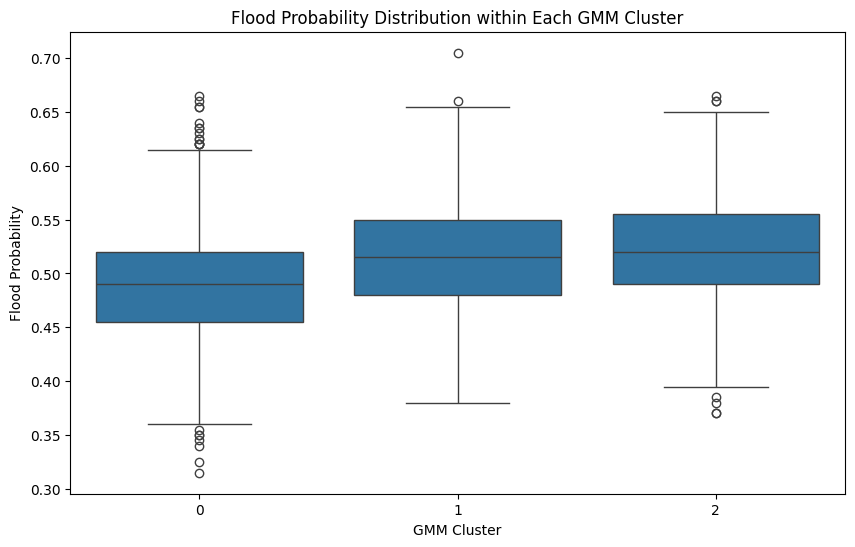

In [ ]:
# Profile each GMM cluster by calculating the mean values of key features
gmm_cluster_profiles = sampled_data.groupby('GMM_Cluster').mean()

print("GMM Cluster Profiles (Mean Feature Values):")
print(gmm_cluster_profiles)

# Visualize flood probability distribution within each GMM cluster
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
sns.boxplot(x='GMM_Cluster', y='FloodProbability', data=sampled_data)
plt.title("Flood Probability Distribution within Each GMM Cluster")
plt.xlabel("GMM Cluster")
plt.ylabel("Flood Probability")
plt.show()

<ipython-input-23-7f2e5d9b4a2a>:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  high_risk_data['SubCluster'] = kmeans_sub.fit_predict(high_risk_data_pca)


Sub-Cluster Profiles (Mean Feature Values):
            MonsoonIntensity  TopographyDrainage  RiverManagement  \
SubCluster                                                          
0                   4.760656            4.852459         4.806557   
1                   5.081081            5.130631         4.878378   
2                   5.157343            5.073427         5.185315   

            Deforestation  Urbanization  ClimateChange  DamsQuality  \
SubCluster                                                            
0                8.163934      5.931148       4.734426     4.990164   
1                6.972973      3.858108       4.058559     4.878378   
2                6.692308      4.646853       6.692308     5.087413   

            Siltation  AgriculturalPractices  Encroachments  ...  \
SubCluster                                                   ...   
0            7.288525               4.862295       5.022951  ...   
1            7.247748               5.069820      

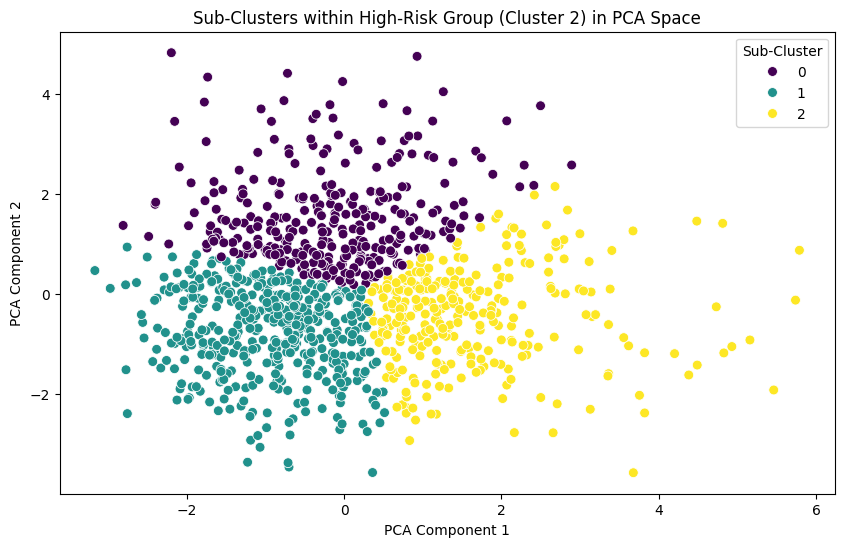

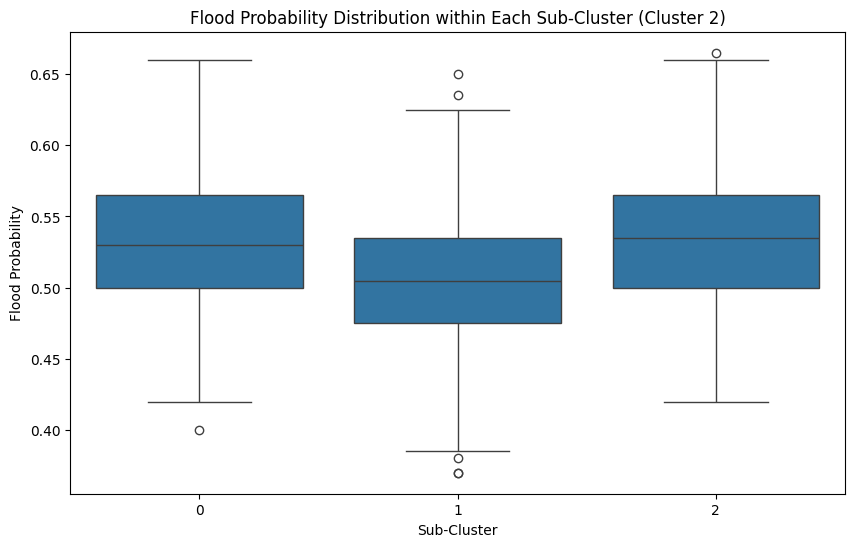

In [ ]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns

# Step 1: Filter data for high-risk cluster (Cluster 2)
high_risk_data = sampled_data[sampled_data['GMM_Cluster'] == 2]

# Step 2: Dimensionality Reduction (Optional, with PCA to 2 components for visualization)
pca = PCA(n_components=2)
high_risk_data_scaled = StandardScaler().fit_transform(high_risk_data.drop(columns=['GMM_Cluster', 'FloodProbability']))
high_risk_data_pca = pca.fit_transform(high_risk_data_scaled)

# Step 3: Apply K-Means Clustering within high-risk group (Cluster 2)
# Let's assume we want 3 sub-clusters within Cluster 2
kmeans_sub = KMeans(n_clusters=3, random_state=42)
high_risk_data['SubCluster'] = kmeans_sub.fit_predict(high_risk_data_pca)

# Step 4: Analyze Sub-Clusters by calculating mean values for each sub-cluster
sub_cluster_profiles = high_risk_data.groupby('SubCluster').mean()

print("Sub-Cluster Profiles (Mean Feature Values):")
print(sub_cluster_profiles)

# Step 5: Visualize the Sub-Clusters in 2D PCA space
plt.figure(figsize=(10, 6))
sns.scatterplot(x=high_risk_data_pca[:, 0], y=high_risk_data_pca[:, 1], hue=high_risk_data['SubCluster'], palette='viridis', s=50)
plt.title("Sub-Clusters within High-Risk Group (Cluster 2) in PCA Space")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.legend(title="Sub-Cluster")
plt.show()

# Optional: Distribution of Flood Probability across Sub-Clusters
plt.figure(figsize=(10, 6))
sns.boxplot(x='SubCluster', y='FloodProbability', data=high_risk_data)
plt.title("Flood Probability Distribution within Each Sub-Cluster (Cluster 2)")
plt.xlabel("Sub-Cluster")
plt.ylabel("Flood Probability")
plt.show()


# CSI Dataset


In [ ]:
# Start writing a report regarding the connections with unsupervised model
# Try the april data as well, EXPLORE UNsupervised with september data
# Project Report, Along with source code
# verazzano different deliverables, We will try satisfying both requirements
# first approach supervised, what is data source and then unsupervised learning approach
# paragraph comparing results for conclusion
# report finalized by December 15th

In [ ]:
import pandas as pd

# Load the dataset
df = pd.read_csv('flood_sensor_data.csv')

print(df.head())
print(df.info())
print(df.describe())

                         Time  fs-00070  fs-00071  fs-00077  fs-00083  \
0  2023/09/29 00:00:00.000000       0.0  0.001667  0.000000       0.0   
1  2023/09/29 00:05:00.000000       0.0  0.001191  0.000000       0.0   
2  2023/09/29 00:10:00.000000       0.0  0.001021  0.000000       0.0   
3  2023/09/29 00:15:00.000000       0.0  0.001623  0.000121       0.0   
4  2023/09/29 00:20:00.000000       0.0  0.001555  0.000276       0.0   

   fs-00101  fs-00073  fs-00100  fs-00096  fs-00049  fs-00048  fs-00047  \
0  0.001616  0.002184       0.0  0.001914  0.005368  0.001408       0.0   
1  0.002843  0.002407       0.0  0.001770  0.004406  0.000956       0.0   
2  0.002423  0.002500       0.0  0.001671  0.005411  0.000523       0.0   
3  0.001178  0.003007       0.0  0.001475  0.006206  0.000427       0.0   
4  0.000928  0.003774       0.0  0.001323  0.006397  0.001076       0.0   

   fs-00032  fs-00031  
0  0.332212  0.002923  
1  0.333371  0.003016  
2  0.334520  0.003376  
3  0.340833  0

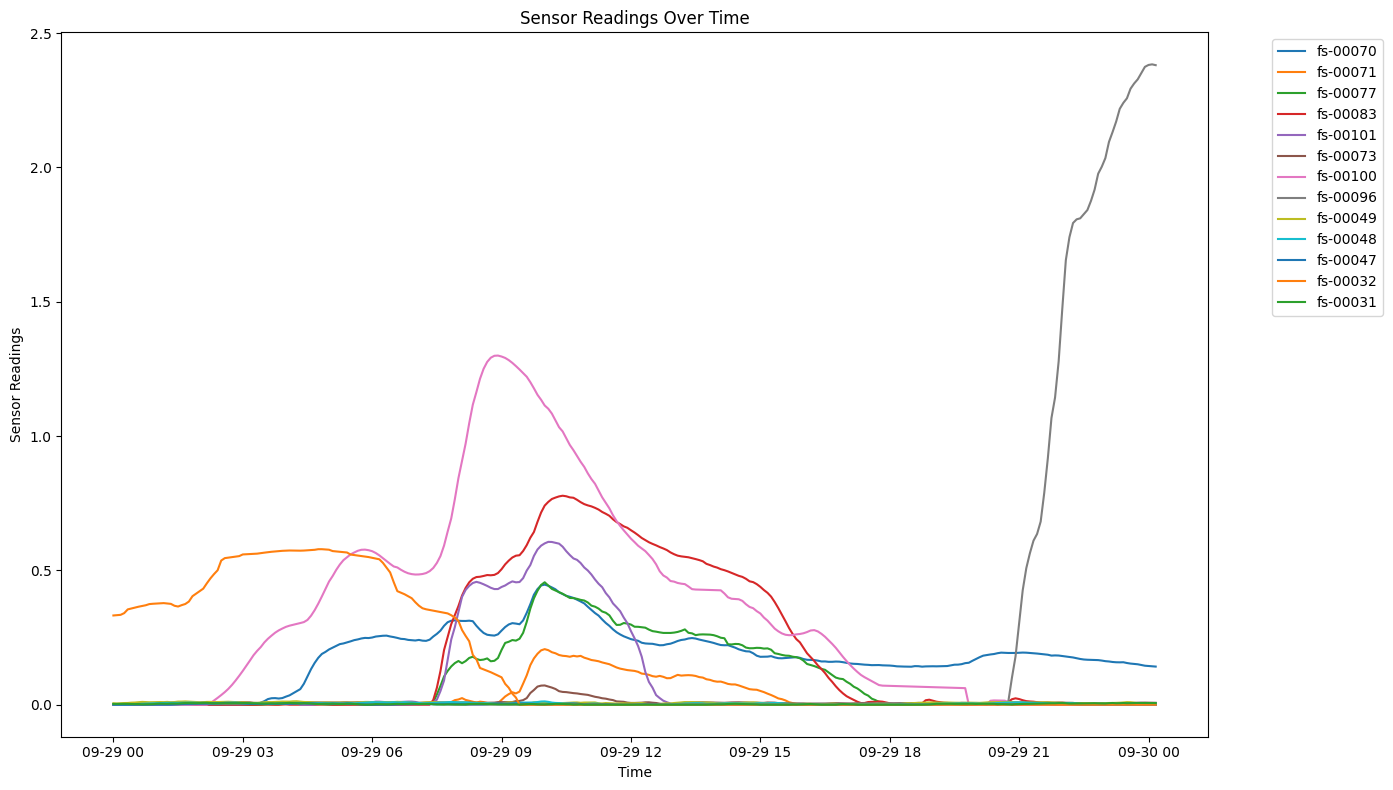

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Convert the 'Time' column to datetime format
df['Time'] = pd.to_datetime(df['Time'])

# Set the 'Time' column as the index for easier time series plotting
df.set_index('Time', inplace=True)

# Plot sensor readings over time for all sensors
plt.figure(figsize=(14, 8))

# Loop through each sensor and plot its time series
for column in df.columns:
    plt.plot(df.index, df[column], label=column)

# Add title and labels
plt.title('Sensor Readings Over Time')
plt.xlabel('Time')
plt.ylabel('Sensor Readings')

# Add a legend
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

# Display the plot
plt.tight_layout()
plt.show()

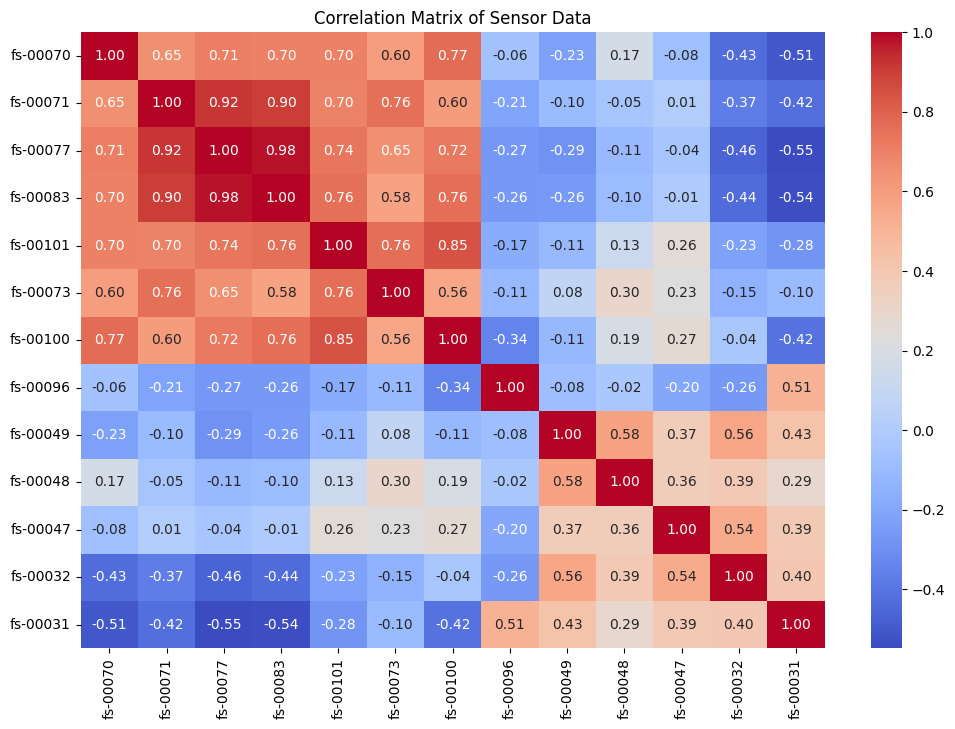

In [ ]:
# Generate a heatmap of correlations between the sensors
plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title('Correlation Matrix of Sensor Data')
plt.show()

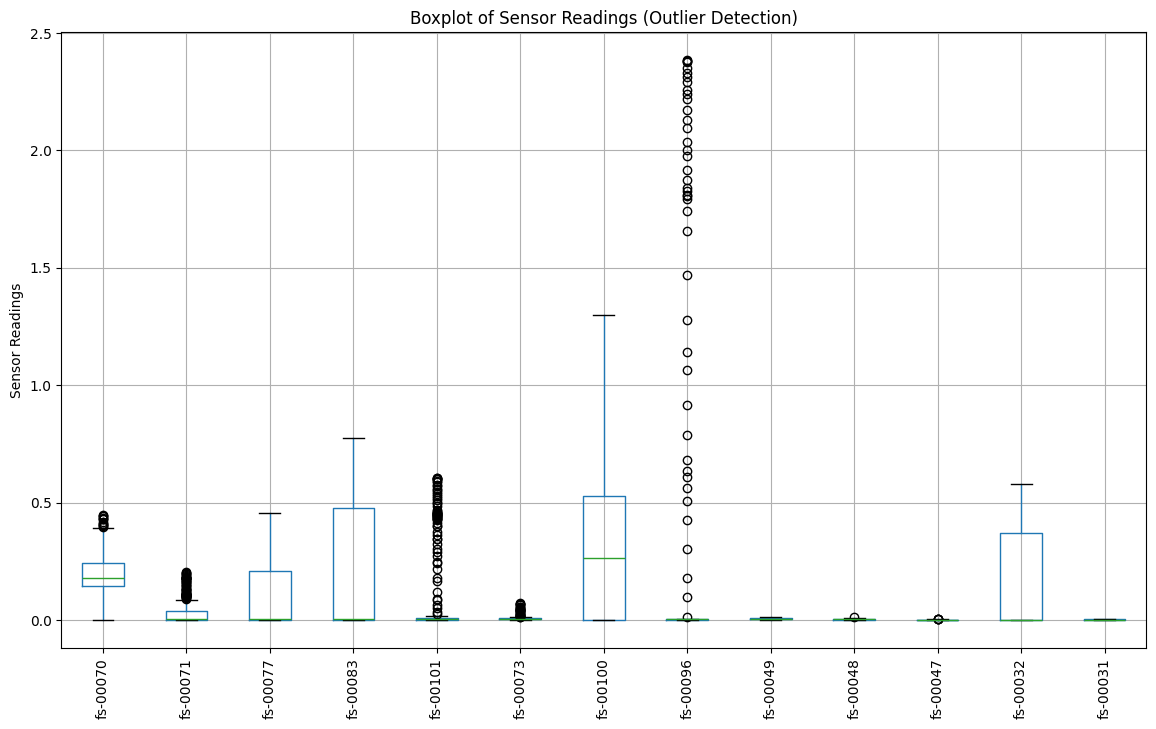

In [ ]:
# Visualize outliers for each sensor using boxplots
plt.figure(figsize=(14, 8))
df.boxplot(rot=90)
plt.title('Boxplot of Sensor Readings (Outlier Detection)')
plt.ylabel('Sensor Readings')
plt.show()

Linear Regression MSE: 0.006480366853202123, R2: 0.9550080712704443
Random Forest MSE: 0.001846448093090475, R2: 0.9871804694257238


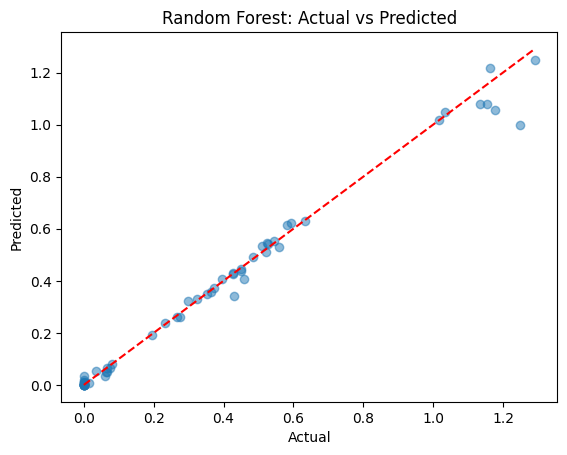

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Set 'fs-00100' as the target and the other sensors as features
X = df.drop(columns=['fs-00100'])
y = df['fs-00100']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Apply Linear Regression
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)

# Apply Random Forest
forest_model = RandomForestRegressor(random_state=42)
forest_model.fit(X_train, y_train)

# Make predictions
y_pred_linear = linear_model.predict(X_test)
y_pred_forest = forest_model.predict(X_test)

# Evaluate both models using Mean Squared Error and R2 Score
mse_linear = mean_squared_error(y_test, y_pred_linear)
r2_linear = r2_score(y_test, y_pred_linear)

mse_forest = mean_squared_error(y_test, y_pred_forest)
r2_forest = r2_score(y_test, y_pred_forest)

print(f"Linear Regression MSE: {mse_linear}, R2: {r2_linear}")
print(f"Random Forest MSE: {mse_forest}, R2: {r2_forest}")

# Visualize the predictions vs actual for Random Forest
plt.scatter(y_test, y_pred_forest, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.title('Random Forest: Actual vs Predicted')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.show()

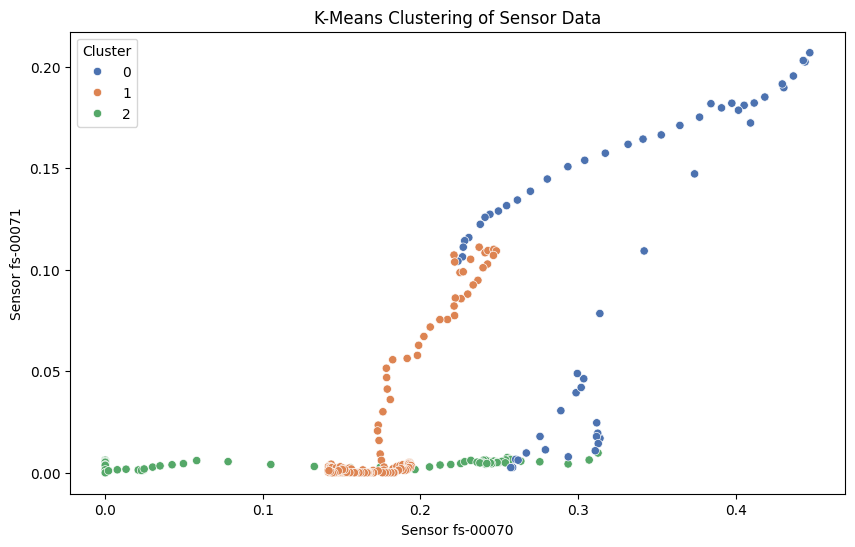

Cluster Centers:
[[ 1.30344406  1.38809531  1.49232681  1.57759684  1.89310604  1.23008009
   1.65390014 -0.36661852 -0.39280561 -0.00364743  0.47979561 -0.50790598
  -0.68469306]
 [-0.12928494 -0.23258345 -0.16323396 -0.20300488 -0.47838803 -0.36193714
  -0.55490904  0.36156516 -0.38234707 -0.40229163 -0.63625978 -0.65318709
  -0.0933161 ]
 [-0.6297808  -0.5132301  -0.69580079 -0.68504895 -0.43252718 -0.19626981
  -0.15063168 -0.36240065  0.88877945  0.66980093  0.74483612  1.41268132
   0.59831427]]


In [ ]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import seaborn as sns

# Normalize the data to prepare for clustering
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df)

# Apply K-Means with a reasonable number of clusters (e.g., 3 clusters)
kmeans = KMeans(n_clusters=3, random_state=42)
df['Cluster'] = kmeans.fit_predict(X_scaled)

# Visualize clusters (using first two sensor readings for simplicity)
plt.figure(figsize=(10, 6))
sns.scatterplot(x=df['fs-00070'], y=df['fs-00071'], hue=df['Cluster'], palette="deep")
plt.title('K-Means Clustering of Sensor Data')
plt.xlabel('Sensor fs-00070')
plt.ylabel('Sensor fs-00071')
plt.show()

# Check cluster centers to understand patterns
print("Cluster Centers:")
print(kmeans.cluster_centers_)
